# Exploring Agoge Data with agoge_viz

This notebook demonstrates how to use the `agoge_viz.py` module to visualize simulation data stored in HDF5 files generated by Agoge. We will walk through loading the data, displaying field slices, and using advanced visualization via yt.

The Agoge simulation code outputs HDF5 files that include 3D field data (e.g., `rho`, `rhou`, `rhov`, `rhow`, `E`, `phi`) along with spatial coordinates and grid metadata. This notebook shows graduate students how to utilize these functionalities step-by-step.

## Prerequisites

Ensure you have the following Python packages installed:

- `numpy`
- `matplotlib`
- `h5py`
- Optionally, `yt` (for advanced volumetric visualization)

You can install these packages using pip:

```bash
pip install numpy matplotlib h5py yt
```

## Loading the Agoge Data

We will start by loading the HDF5 file using the provided functions in the `agoge_viz.py` module. In this example, we assume you have a file named `sample.h5` that was generated by Agoge.

In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Import the agoge_viz module functions
from agoge_viz import load_agoge_data, plot_field

# Specify the filename of the HDF5 file
filename = "../agoge_final.h5"

try:
    data = load_agoge_data(filename)
    print("Data loaded successfully.")
    print("Available fields:", list({k for k in data.keys() if k in ["rho", "rhou", "rhov", "rhow", "E", "phi"]}))
    print("Coordinate arrays:", 'x' in data and 'y' in data and 'z' in data)
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Data loaded successfully.
Available fields: ['rhov', 'rhou', 'rhow', 'phi', 'E', 'rho']
Coordinate arrays: True


ValueError: x and y must have same first dimension, but have shapes (128,) and (1024,)

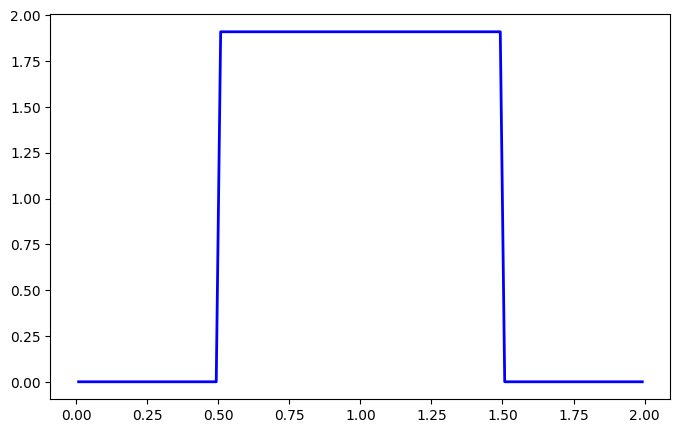

In [16]:
# New code cell demonstrating 1D line plot for the SodShockTube problem using actual agoge output.
import numpy as np
import matplotlib.pyplot as plt
from agoge_viz import load_agoge_data, plot_line

# Load initial and final condition files from Agoge output
filename_init = "../agoge_init.h5"    # Initial condition file
filename_final = "../agoge_final.h5"    # Final condition file

# Load data using the agoge_viz helper function.
data_init = load_agoge_data(filename_init)
data_final = load_agoge_data(filename_final)


# Use the plot_line function to create a professional looking 1D line plot.
# For a 1D SodShockTube simulation along the z-axis, we extract the density profile using the singleton indices [0, 0, :].
rho_init_profile = data_init["rho"][data_init["rho"].shape[0] // 2, data_init["rho"].shape[1] // 2, :]
rho_final_profile = data_final["rho"][data_final["rho"].shape[0] // 2, data_final["rho"].shape[1] // 2, :]

plot_line(data_init["x"], [rho_init_profile, rho_final_profile],
          labels=["Initial Condition", "Final Condition"],
          title="SodShockTube: Initial vs Final Density",
          xlabel="z",
          ylabel="Density",
          styles=["b-", "r--"])

## Visualizing a Field Slice

Now that the data is loaded, let's visualize a slice of a field. We will use `plot_field` to create a contour plot of the density (`rho`) field. By default, the script slices along the `z` axis at the mid-plane, but you can specify different axes and indices.

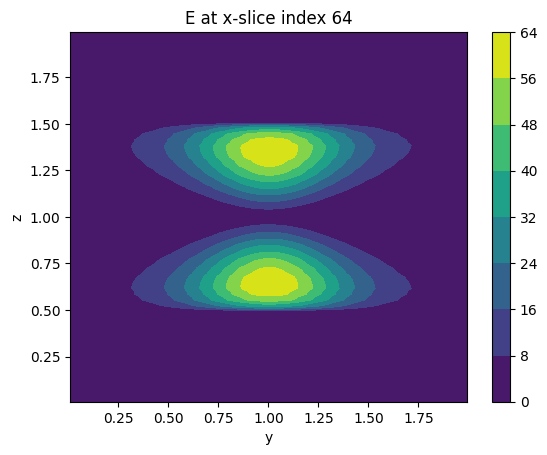

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from agoge_viz import * # Specify the filename of the HDF5 file
filename = "../agoge_final.h5"
data = load_agoge_data(filename)

# Choose the field to visualize (e.g., 'rho')
field_name = "E"
field_data = data[field_name]

# Use coordinate arrays from data
x = data["x"]
y = data["y"]
z = data["z"]

# Plot a slice. You can adjust the axis and index as needed.
plot_field(field_data, x, y, z, axis='x', field_name=field_name)

# To visualize a slice along the y-axis at index 50, for example:
# plot_field(field_data, x, y, z, axis='y', index=50, field_name=field_name)

## Advanced Visualization with yt

If you installed `yt`, you can take advantage of its powerful 3D visualization tools. The `agoge_viz` module automatically integrates with yt to generate projection plots. The following code demonstrates how to load the dataset into yt and create a projection plot along the z-axis.

In [3]:
try:
    import yt

    # Load the dataset via yt (yt will recognize the HDF5 file structure from Agoge)
    ds = yt.load(filename)

    # Create a projection plot of the 'rho' field along the z-axis
    proj = yt.ProjectionPlot(ds, 'z', field_name)
    proj.show()
    
except ImportError:
    print("yt is not installed; advanced visualization is unavailable.")
except Exception as e:
    print(f"An error occurred while using yt: {e}")

## Additional Functionality

This notebook can be extended further to analyze various test problems. For instance, you might:

- Compare different fields side by side
- Generate animations of slices over time (if the file contains time series data)
- Compute derived quantities (e.g., Mach number) from the loaded fields

The `agoge_viz.py` module is designed to be modular and extensible. Students are encouraged to experiment with the data, modify visualization parameters, and integrate additional analysis as needed.

Below is an example of how you might create a combined plot of two fields:

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1, 512)

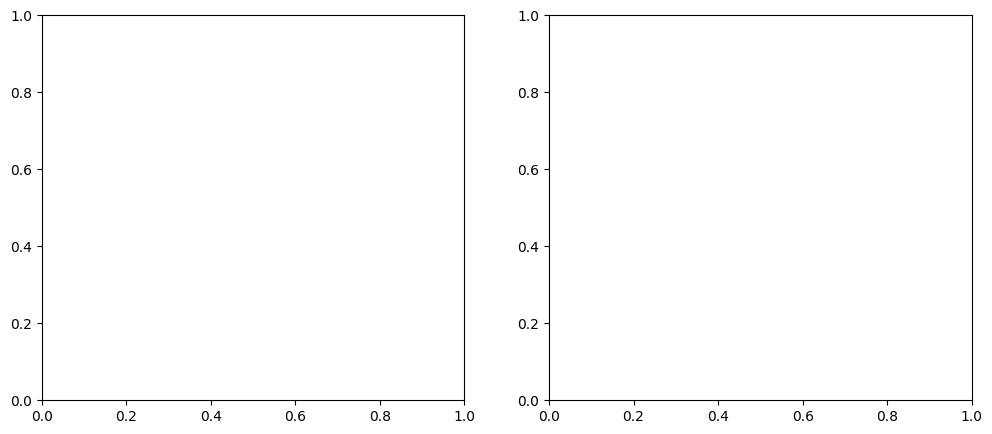

In [5]:
# Example: Side-by-side comparison of 'rho' and 'E'
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fields = ['rho', 'E']
titles = ['Density', 'Energy']

for ax, field, title in zip(axes, fields, titles):
    fdata = data[field]
    # Choose z-slice at mid-plane
    mid_index = fdata.shape[0] // 2
    slice_data = fdata[mid_index, :, :]
    X, Y = np.meshgrid(x, y, indexing='xy')
    c = ax.contourf(X, Y, slice_data, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    fig.colorbar(c, ax=ax)

plt.tight_layout()
plt.show()

## Conclusion

This notebook provided a walkthrough of using the `agoge_viz.py` module for visualizing simulation outputs from Agoge. The notebook demonstrated:

- Loading HDF5 field data and spatial coordinates
- Visualizing a field slice using matplotlib
- Leveraging yt for advanced 3D visualization

Students are encouraged to build upon these examples to suit their research needs and explore the rich simulation data produced by Agoge.